In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import jieba
import numpy as np
import nltk
import jieba.posseg as psg
import itertools
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [59]:
# Download the punctuation
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Load datasets
chinese_df = pd.read_excel('/content/lifelong learning_Chinese.xlsx')
english_df = pd.read_csv('/content/lifelong learning_English.csv', encoding='utf-8')

# Load Chinese stopwords
with open('/content/Chinese_stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords = set([line.strip() for line in file])

additional_stopwords = ['learning', 'study', 'lifelong', 'education', 'research']
stopwords.update(additional_stopwords)


# Combine columns for word clouds
chinese_combined = chinese_df['题名'] + ' ' + chinese_df['摘要']
english_combined = english_df['Article Title'] + ' ' + english_df['Abstract']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [60]:
# Process the Chinese dataset
def get_Chinese_wordlist(text,maxn,stop_words):
    flag_list = ['n','ns','nz','vn','v','vf','vi','a','an'] # n: noun，ns: place name，nz: other entity names，v: verb，vn: nominal verbs，vf: directional verb，vi: intransitive verb，a: adjective，an: adnoun
    counts={}

    text_seg = psg.cut(text)
    for word_flag in text_seg:
        #word = re.sub("[^\u4e00-\u9fa5]","",word_flag.word)
        word = word_flag.word
        if word_flag.flag in flag_list and len(word)>1 and word not in stop_words:
            counts[word]=counts.get(word,0)+1


    words= sorted(counts.items(),key=lambda x:x[1],reverse=True)

    return words

# Chinese dataframe to list
chinese_combined_list = chinese_combined.tolist()
Chinese_text = ' '.join(chinese_combined_list)
# Get the word list
topwords = get_Chinese_wordlist(Chinese_text, 50, stopwords)

topwords[0:5]

[('建设', 1006), ('学习型', 690), ('政策', 536), ('职业', 517), ('改革', 503)]

In [61]:
# Process the English dataset
english_combined_list = (english_df['Article Title'] + ' ' + english_df['Abstract']).tolist()

tokens = []
for text in english_combined_list:
    if pd.notnull(text):
        tokens.extend(word_tokenize(text.lower()))

# Define the POS tags we are interested in
desired_pos_tags = {'NN', 'NNS', 'NNP', 'NNPS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS'}

# Filter tokens by the desired POS tags and remove stopwords
filtered_tokens = [word for word, pos in pos_tag(tokens) if pos in desired_pos_tags and word.lower() not in stopwords]

# Calculate frequency distribution

# Calculate frequency distribution
frequency_distribution = nltk.FreqDist(filtered_tokens)

# Convert the frequency distribution to a dictionary
English_words = dict(frequency_distribution)

# Reorganize the English words dictionary based on frequency
sorted_English_words = dict(sorted(English_words.items(), key=lambda item: item[1], reverse=True))

dict(itertools.islice(sorted_English_words.items(), 5))

{'development': 854,
 'students': 765,
 'educational': 654,
 'skills': 624,
 'social': 607}

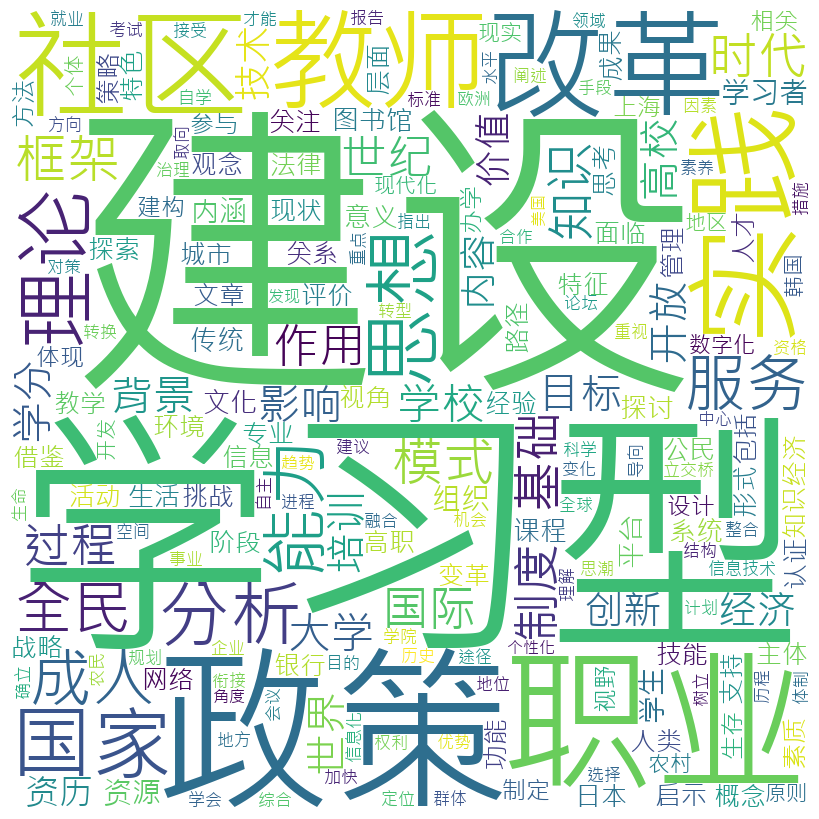

In [62]:
# Convert the list to a dictionary
word_freq_dict = dict(topwords)

# Create a WordCloud object
wordcloud = WordCloud(font_path='/content/msjh.ttc',
                width=800, height=800,
                background_color='white').generate_from_frequencies(word_freq_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

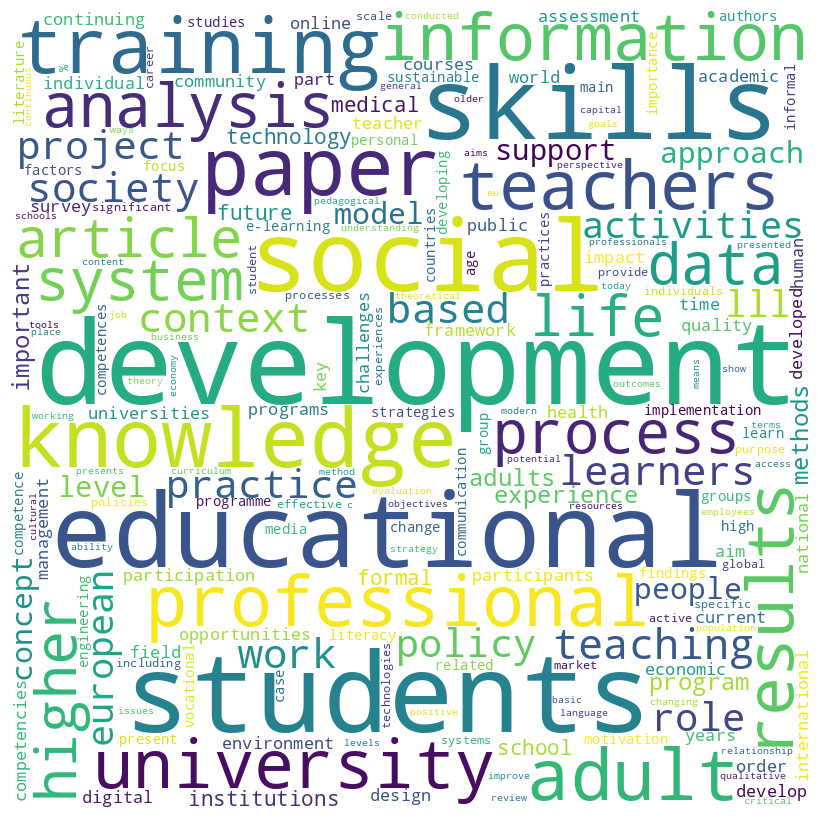

In [63]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800,
                background_color='white').generate_from_frequencies(sorted_English_words)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [64]:
# Function to plot bar chart for year distribution
def plot_year_distribution(df, year_column, title):
    year_distribution = df[year_column].value_counts().sort_index()
    year_distribution.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Number of Publications')
    plt.show()

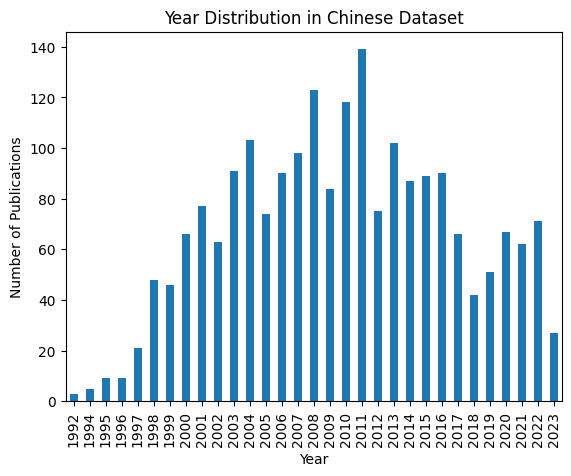

In [67]:
# Plot bar charts for year distribution
plot_year_distribution(chinese_df, '年份', 'Year Distribution in Chinese Dataset')

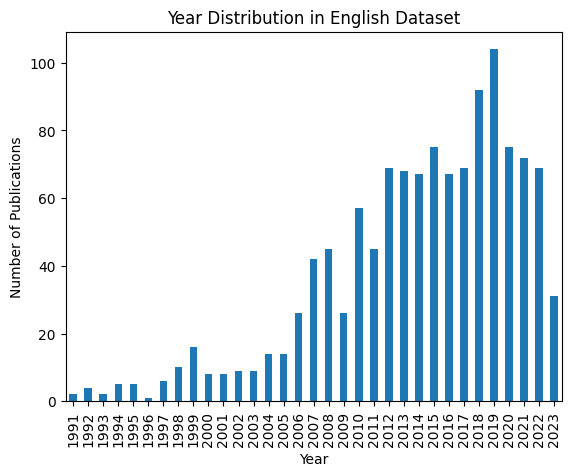

In [66]:
plot_year_distribution(english_df, 'Publication Year', 'Year Distribution in English Dataset')